## Packages 

In [68]:
from control.matlab import tf,step,stepinfo,pzmap,ss,ss2tf,pole,lsim,ss,series,feedback
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import pairwise_distances

# Homework Questions:

## 1)
The unit steps responses of two systems A and B are recorded and reported in the
files attached to the homework assignment. In each file, the first column gives the time vector, t, and the second column provides the output response, y(t), for the systems A in **HW2_ex1_dataA.txt** and B in **HW2_ex1_dataB.txt**

    1. Load the data and plot the responses for systems A and B.
    2. Identify the order of the systems. Based on the plots, estimate the transient response characteristics, 
    such as time constant, settling time, rise time, peak time and percentage of overshoot.
    Write the corresponding transfer functions $T_A(s)$ and $T_B(s)$ for the systems A and B, respectively.
    3. Plot and compare the step response of the systems $T_A(s)$ with the data provided in \path{HW2_ex1_dataA.txt}.
    4. Plot and compare the step response of the systems $T_B(s)$ with the data provided in \path{HW2_ex1_dataB.txt}


## Plotting the data

In [4]:
sys_A_df = pd.read_csv('sysA.csv')
sys_B_df = pd.read_csv('sysB.csv')

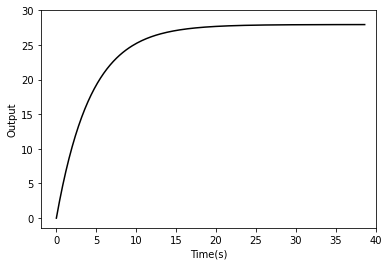

In [5]:
plt.plot(sys_A_df['Tempo'],sys_A_df['Output'],'k')
#plt.grid('on')
plt.xlabel('Time(s)')
plt.ylabel('Output')
plt.ylim(top=30)
plt.xlim(right=40)
plt.savefig('EXE_1_SYS_A.eps',format='eps')
plt.show()

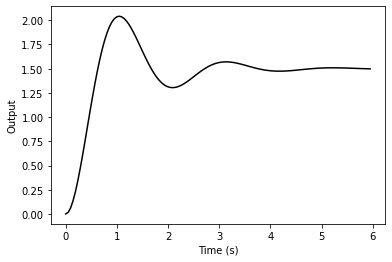

In [7]:
plt.plot(sys_B_df['Tempo'],sys_B_df['Output'],'k')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.savefig('EXE_1_SYS_B.eps',format='eps')
plt.show()

## System A

## System identification:

In [8]:
Final_Value=sys_A_df['Output'].values[-1]
time_constant_output = 0.63*Final_Value
print(time_constant_output)
initial_value_time = (sys_A_df.loc[sys_A_df['Output']<=time_constant_output]['Tempo'].values[-1])
final_value_time  = (sys_A_df.loc[sys_A_df['Output']>=time_constant_output]['Tempo'].values[0])

17.606295


In [9]:
time_constant_range=np.arange(initial_value_time,final_value_time,0.001)
error_vector =[]
for time_constant in time_constant_range: 
    a = 1/time_constant
    sys_A_tf = tf([Final_Value*a],[1,a])
    y_out_test,T=step(sys_A_tf,np.arange(0,196*0.198,0.198))
    error= mse(sys_A_df['Output'],y_out_test)
    error_vector.append(error)

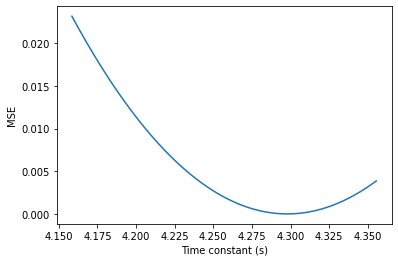

In [14]:
plt.plot(time_constant_range,error_vector)
plt.ylabel('MSE')
plt.xlabel('Time constant (s)')
plt.savefig('EXE_1_MSE_TIME_CONSTANT.eps',format='eps')
plt.show()

In [15]:
time_constant=time_constant_range[error_vector.index(min(error_vector))]

In [16]:
a = 1/time_constant

In [17]:
time_constant=time_constant_range[error_vector.index(min(error_vector))]

a = 1/time_constant

sys_A_tf = tf([Final_Value*a],[1,a])

step_info_sys_A = stepinfo(sys_A_tf)
settling_time = 4/a
rise_time = 2.2/a 

print("Final values (Gain): ",Final_Value)
print("Value in the time constant: ",time_constant_output)
print("Value of the constant:",a)
print("Time constant: ",time_constant)
print("Settling time (from stepinfo): ",step_info_sys_A['SettlingTime'])
print("Rise time (from stepinfo): ",step_info_sys_A['RiseTime'])
print("Settling time: ",settling_time)
print("Rise time: ",rise_time)

print("The transfer function: ",sys_A_tf)

Final values (Gain):  27.9465
Value in the time constant:  17.606295
Value of the constant: 0.23269342641070137
Time constant:  4.2975000000000465
Settling time (from stepinfo):  16.652274774774956
Rise time (from stepinfo):  9.395135135135238
Settling time:  17.190000000000186
Rise time:  9.454500000000104
The transfer function:  
  6.503
----------
s + 0.2327



## Comparing the system responses

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


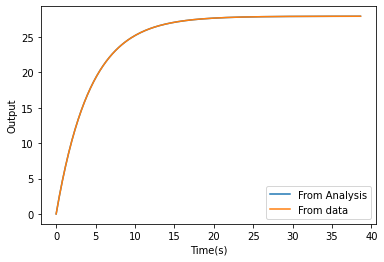

In [18]:
y_out,T=step(sys_A_tf,np.arange(0,196*0.198,0.198))
plt.plot(T,y_out,label='From Analysis')
plt.plot(sys_A_df['Tempo'],sys_A_df['Output'],label='From data')
plt.legend()
#plt.grid('on')
plt.xlabel('Time(s)')
plt.ylabel('Output')
plt.savefig('EXE_1_COMPARE_SYS_A.eps',format='eps')
plt.show()

In [19]:
print("The MSE of the system response is: ",mse(sys_A_df['Output'],y_out))

The MSE of the system response is:  7.325786505946478e-06


## System B

## System identification:

In [21]:
final_value = sys_B_df['Output'].values[-1]
max_value = max(sys_B_df['Output'].values)
peak_time = sys_B_df.loc[sys_B_df['Output']==max_value]['Tempo'].values[0]
OS = ((max_value-final_value)/final_value)*100


aux = np.log(OS/100)
damping_ratio = -aux/(np.pi**2+aux**2)**0.5

omega_n = np.pi/(peak_time*(1-damping_ratio**2)**0.5)

settling_time_b = 4/(damping_ratio*omega_n)


K = final_value

sys_B_tf = tf([K*omega_n**2],[1,2*omega_n*damping_ratio,omega_n**2])
step_info_sys_B = stepinfo(sys_B_tf)

print("Rise Time (from stepinfo):",step_info_sys_B['RiseTime'])
print("Settling time:",settling_time_b)
print("Peak Time:",peak_time)
print("The natural frequency: ",omega_n)
print("The damping ratio:",damping_ratio)
print("Overshoot",OS)
print("The gain of the system: ",K)
print(sys_B_tf)

Rise Time (from stepinfo): 0.4234137221707572
Settling time: 4.096758435337402
Peak Time: 1.0391
The natural frequency:  3.177127493569535
The damping ratio: 0.307315872711106
Overshoot 36.25625625625625
The gain of the system:  1.4985

        15.13
---------------------
s^2 + 1.953 s + 10.09



## Comparing the system responses

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


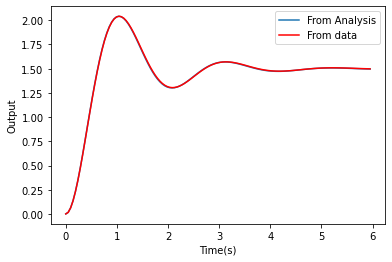

In [22]:
y_out_b,T=step(sys_B_tf,np.arange(0,6,6/127))
plt.plot(T,y_out_b,label='From Analysis')
plt.legend()
plt.plot(sys_B_df['Tempo'],sys_B_df['Output'],label='From data',color='r')
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Output")
plt.savefig('EXE_1_COMPARE_SYS_B.eps',format='eps')
plt.show()

In [15]:
error= mse(sys_B_df['Output'],y_out)
print("The MSE:",error)

The MSE: 1.8270357945811916e-05


## 2)
Consider a system with the transfer function in (1):
$$G(s) =\frac{τs + 1}{
(0.1s +
1)(0.002s^2+0.02s+1)(s^2+0.1s+1)}$$
1. 
    Consider $\tau = 0.5$<br>
    Find the poles and zeros of the  system. Plot them in a zero-pole map and
    draw some conclusions.
2.  Use a dominant-pole argument to find an equivalent second-order transfer function. Can the zero be neglected in this case? Plot and compare the step
responses for system as in (1) and the second order equivalent one. Explain
the differences between the two responses.

3.  Consider $\tau = 20$<br>
Find the poles and zeros of the system. Plot them in a zero-pole map and
    draw some conclusions.
4. Use a dominant-pole argument to find an equivalent second-order transfer function. Can the zero be neglected in this case? Plot and compare the step
responses for system as in (1) and the second order equivalent one. Explain
the differences between the two responses

## For $\tau=0.5$

## Calculating the transfer function and check the poles and zero maps.

In [47]:
def sys_tau(tau):    
    s = tf('s')
    system=(tau*s + 1)/((0.1*s +1)*(0.002*(s**2)+0.02*s+1)*((s**2)+0.1*s+1))
    return system

In [49]:
system = sys_tau(0.5)
system


                          0.5 s + 1
--------------------------------------------------------------
0.0002 s^5 + 0.00402 s^4 + 0.1206 s^3 + 1.016 s^2 + 0.22 s + 1

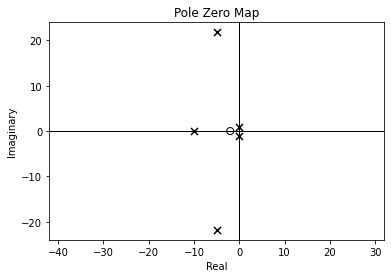

In [41]:
poles_1,zeros = pzmap(system)
plt.savefig('EXE_2_POLE_ZERO_MAP.eps',format='eps')

In [42]:
pole(system)

array([ -5.  +21.79449472j,  -5.  -21.79449472j, -10.   +0.j        ,
        -0.05 +0.99874922j,  -0.05 -0.99874922j])

## Poles and zero reduction.

In [27]:
sys_2 = tf([1],[1,0.1,1])

In [28]:
print(sys_2)


       1
---------------
s^2 + 0.1 s + 1



(array([-0.05+0.99874922j, -0.05-0.99874922j]), array([], dtype=float64))

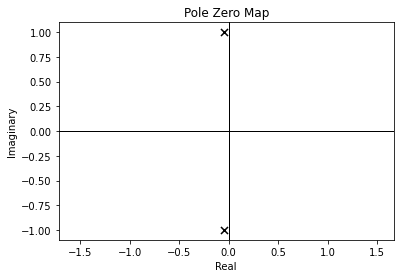

In [29]:
pzmap(sys_2)

## Plotting the step response

In [50]:
T_aux = np.arange(0,140,0.01)
y_out,T=step(system,T_aux)
y_out_2,T = step(sys_2,T_aux)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


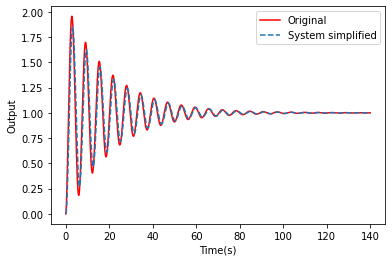

In [51]:
plt.plot(T,y_out,color='r',label='Original')
plt.plot(T,y_out_2,'--',label='System simplified')
plt.xlabel('Time(s)')
plt.ylabel('Output')
plt.legend()
plt.savefig('EXE_2_ITEM_2.eps',format='eps')
plt.show()

In [52]:
mse(y_out,y_out_2)

0.005130792984115895

## For $\tau=20$

1. Find the poles and zeros of the system. Plot them in a zero-pole map and
draw some conclusions.
2. Use a dominant-pole argument to find an equivalent second-order transfer function. Can the zero be neglected in this case? Plot and compare the step responses for system as in (1) and the second order equivalent one. Explain
the differences between the two responses

## Calculating the transfer function and check the poles and zero maps.

In [53]:
system_2 = sys_tau(20)

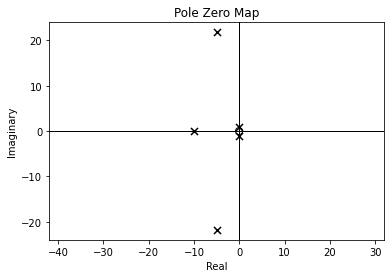

In [55]:
poles,zeros = pzmap(system_2)
plt.savefig('EXE_2_POLE_ZERO_MAP_2.eps',format='eps')

In [56]:
sys_2 = tf([20,1],[1,0.1,1])
print(sys_2)


    20 s + 1
---------------
s^2 + 0.1 s + 1



In [57]:
sys_3 = tf([1],[1,0.1,1])

In [58]:
T_aux = np.arange(0,100,0.1)

In [59]:
y_out,T=step(system_2,T_aux)
y_out_2,T = step(sys_2,T_aux)
y_out_3,T = step(sys_3,T_aux)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


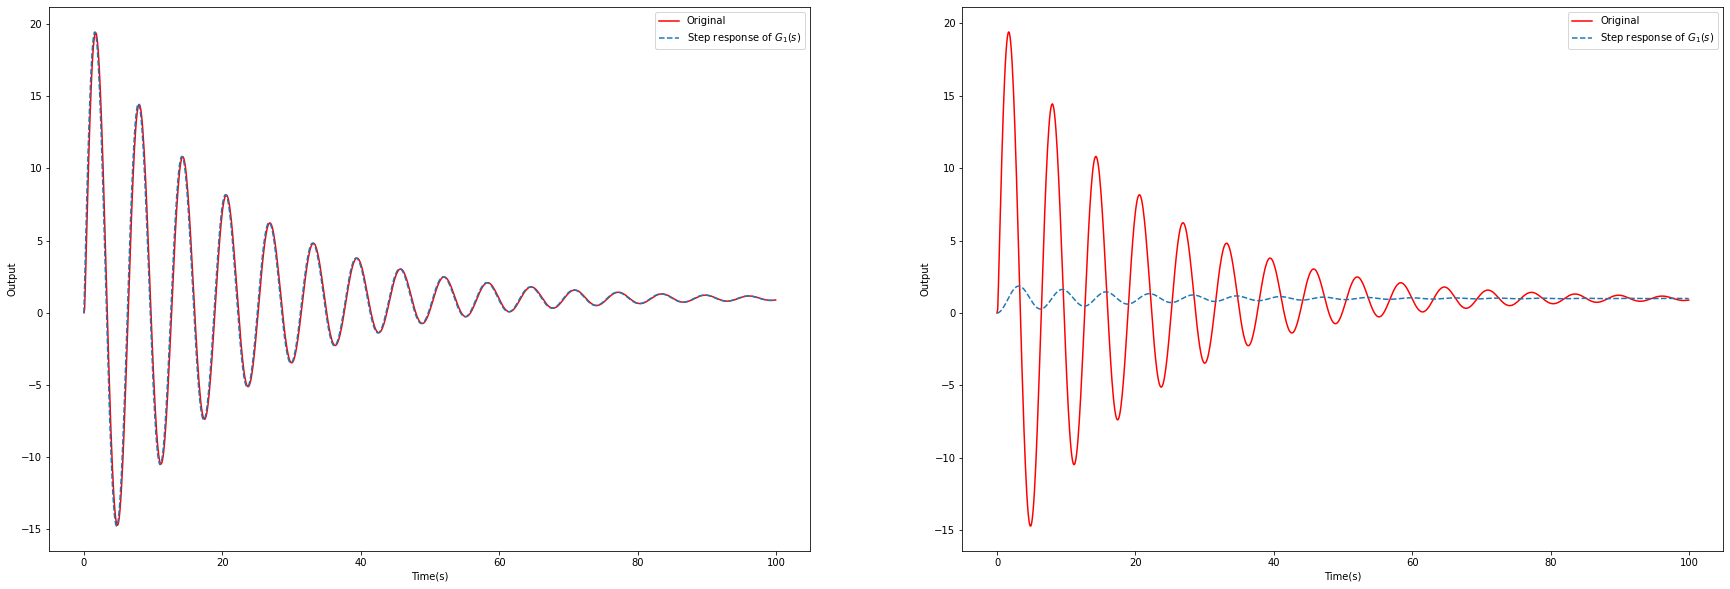

In [64]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(T,y_out,color='r',label='Original')
plt.plot(T,y_out_2,'--',label='Step response of $G_1(s)$')
plt.xlabel('Time(s)')
plt.ylabel('Output')
plt.legend()
plt.savefig('EXE_2_ITEM_4.eps',format='eps')
plt.subplot(1,2,2)
plt.plot(T,y_out,color='r',label='Original')
plt.plot(T,y_out_3,'--',label='Step response of $G_1(s)$')
plt.xlabel('Time(s)')
plt.ylabel('Output')
plt.legend()
plt.savefig('EXE_2_ITEM_4.eps',format='eps')
plt.show()

## 3)
Given the state-space model in (4):
$$\begin{cases}
\begin{bmatrix}\dot{x}_1(t)\\
\dot{x}_2(t)\end{bmatrix}= \begin{bmatrix}0 & 1 \\
-5 & -2 \end{bmatrix}\begin{bmatrix}x_1(t) \\x_2(t)\end{bmatrix}+\begin{bmatrix}0\\2\end{bmatrix}u(t)\\
y(t) = \begin{bmatrix} 0 & 1\end{bmatrix}\begin{bmatrix}x_1(t) \\ x_2(t)\end{bmatrix}
\end{cases} $$ 

  1. Define the transfer function W (s) 
  of  the given system and evaluate the its BIBO stability. Briefly explain the concept of BIBO stability.
  
  2. Define the Lyapunov’s stability of the given system. Briefly explain the concept of stability according to Lyapunov. How does it differ from the BIBO stability?<br>
  
Lyapunov's stability avaliates how the initial state impacts the state response of the system. If the inital state makes the state response goes to zero, then the system is called **Asymptoticaly stable**. If the initial state makes the state response goes to a bounded non zero value, so the system is called **Marginaly stable**. It diferenciates from the BIBO stability beacause BIBO looks to the impact of the external interactions over the system response. In mathematical terms, we can check the stability in the sense of Lyapunov looking to the eigenvalues of the system.
  1. If the matrix A has all eigenvalues with negative real part, so the system is asymptotically stable
  2. If the matrix A has eigenvalues with negative and null real part, so the system is marginaly stable.


### Checking the BIBO stability:

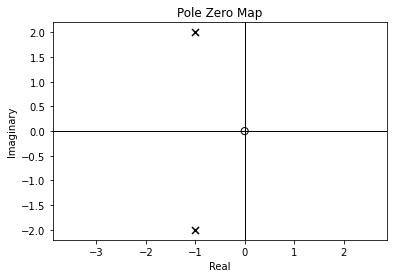

In [66]:
A = [[0,1],[-5,-2]]
B = [[0],[2]]
C = [0,1]
D = [0]
sys = ss2tf(A,B,C,D)
pzmap(sys)
plt.savefig('EXE_3_POLE_ZERO_MAP.eps',format='eps')

In [67]:
sys


     2 s
-------------
s^2 + 2 s + 5

In [34]:
T = np.arange(0,7,0.01)
U_input = 0*T

In [55]:
points =np.random.rand(10,2)

In [56]:
points

array([[0.63283756, 0.65998964],
       [0.71219722, 0.64015859],
       [0.75484448, 0.4533743 ],
       [0.49303473, 0.83517436],
       [0.32689188, 0.62947365],
       [0.41688534, 0.42248133],
       [0.87840792, 0.41726232],
       [0.13214402, 0.0885179 ],
       [0.93447437, 0.63211387],
       [0.68767847, 0.52187115]])

In [57]:
sys_linear = ss(A,B,C,D)

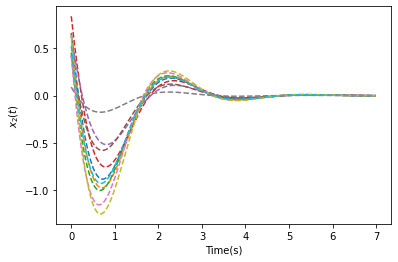

In [59]:
for point in points:
    y_out_q3 = lsim(sys_linear,T=T,U=U_input,X0=point)
    plt.plot(T,y_out_q3[0],'--')
    plt.xlabel('Time(s)')
    plt.ylabel('$x_2(t)$')
    plt.savefig('EXE_3_SYS_LYAPUNOV.eps',format='eps')

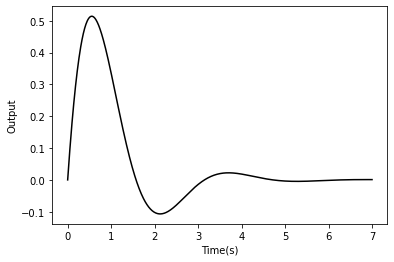

In [52]:
y_out_q3_step ,T = step(sys_linear,T=T)
plt.plot(T,y_out_q3_step,'k')
plt.xlabel('Time(s)')
plt.ylabel('Output')
plt.savefig('EXE_3_SYS_OUTPUT.eps',format='eps')
plt.show()

### Checking the Lyapunov stability:

In [ ]:
eigenvalues,eigenvectors = np.linalg.eig(A)

In [ ]:
eigenvalues

array([-1.+2.j, -1.-2.j])

## 4) 
For the unit feedback system in figure (1), G(s) is given as in (3).
 1. Use the Routh-Hurwitz criterion to define:


*   The range of K that provides stability to the closed-loop system.
*   The range of K that makes the system oscillate.

2. Plot and discuss the step responses for stable and oscillatory values of K.


### 4.1 Creating the Routh table:

$$G(s) = \frac{(s+4)}{s(s^2+3.2s+2.4)}$$
$$C(s) = \frac{KG(s)}{1+KG(s)}$$
$$C(s) = \frac{K(s+4)}{s^3+3.2s^2+2.4s+K(s+4)}$$
The Routh Table:

|$s^3$|1|2.4+K|
|---|---|---|
|$s^2$|3.2| 4K
|s|(3.2(2.4+K)-4K)/3.2|0|
|1|4K|0

$$(3.2(2.4+K)-4K)>0$$
The interval of values that the system is stable is: $$9.6>K>0$$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


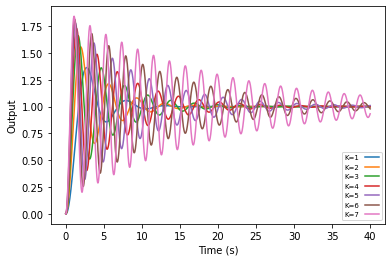

In [52]:
stable_range =np.arange(1,8,1)
matrix = []
T_aux = np.arange(0,40,0.01)
for K in stable_range:
    sys = tf([K,4*K],[1,3.2,(2.4+K),4*K])
    y_out,T=step(sys,T_aux)
    plt.plot(T,y_out,label=f'K={K}')
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
plt.legend(loc='lower right',markerfirst=False,fontsize=7)
plt.savefig('EXE_4_MULTIPLE_PLOTS.eps',format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


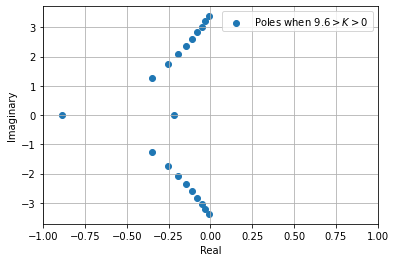

In [65]:
stable_range =np.arange(0.1,9.5,1)
matrix = []
for K in stable_range:
    sys = tf([K,4*K],[1,3.2,(2.4+K),4*K])
    matrix.append(pole(sys))
matrix=np.array(matrix)
x_negative = []
y_negative = []
x_positive = []
y_positive = []
for vector in matrix:
    for point in vector:
        if point.real<=0:
          x_negative.append(point.real)
          y_negative.append(point.imag)
        else:
          x_positive.append(point.real)
          y_positive.append(point.imag)
plt.scatter(x_negative,y_negative,label='Poles when $9.6>K>0$')
#plt.scatter(x_positive,y_positive,label='Poles when $K>9.6$')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim(left=-1,right=1)
plt.legend()
plt.grid('on')
plt.savefig('EXE_4_ITEM_2.eps',format='eps')

## For K=9.6

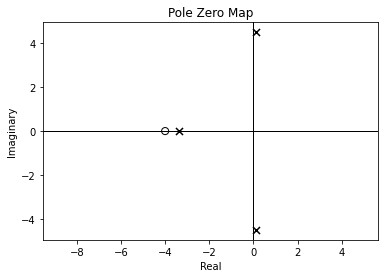

In [178]:
pzmap(sys)
plt.savefig('EXE_4_ITEM_3.eps',format='eps')

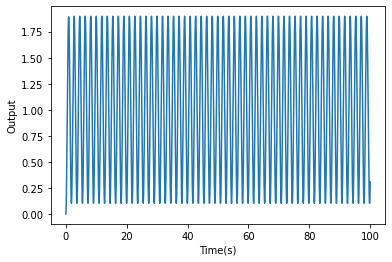

In [219]:
K = 9.6
sys = tf([K,4*K],[1,3.2,(2.4+K),4*K])
T_aux = np.arange(0,100,0.01)
yout,T=step(sys,T_aux)

plt.plot(T,yout)
plt.xlabel('Time(s)')
plt.ylabel('Output')
plt.savefig('EXE_4_ITEM_5.eps',format='eps')
plt.show()

## 5)
A unity feedback system has the forward transfer function given by:
$$G(s) = \frac{1}{s}\frac{K(s+7)}{(s^3+25s^2+196s+480)} $$
1. Evaluate the system type.
2. Find the value of K to yield a 1% error in steady-state for an input of (0.1*t).
3. Find the static error constants for the value of K found in point (2) of this exercise.
4. Verify the stability of your system and plot its step response.

### 5.1) The system is type 1, because the number of integrators in the foward path is 1.

### 5.2) To calculate the Error we do:
$$(R(s)-Y(s))G(s) = Y(s)\\
\frac{R(s)G(s)}{1+G(s)} = Y(s)\\
E(s) = R(s)-Y(s)\\
E(s) = R(s)(1-\frac{G(s)}{1+G(s)})\\
E(s) = R(s)\frac{1}{1+G(s)}$$
The steady state error is 1%:
$$0.01=\lim_{s \rightarrow 0}sE(s)=\lim_{s \rightarrow 0} s\frac{0.1}{s^2}\frac{1}{1+G(s)}=\frac{0.1}{\lim_{s\rightarrow 0}sG(s)}=\frac{0.1*480}{7K}$$
So,
$$K= 685.71$$ 

### 5.3)
$$K_p = \lim_{s\rightarrow 0}G(s)=\infty$$
$$K_v = \lim_{s\rightarrow 0}G(s)=\frac{0.1}{0.01}=10$$
$$K_a = \lim_{s\rightarrow 0}s^2G(s)=0$$

### 5.4) Checking the stability

|$s^4$|1|196|7K|
|---|---|---|---|
|$s^3$ |$$25$$|$$(480+k)$$|$$0$$|
|$s^2$|$$\frac{4420-k}{25}$$|$$7K$$|$$0$$|
|$s$|$$\frac{((480+k)\frac{4420-k}{25}-7K25)}{\frac{4420-k}{25}} $$|$$0$$|$$0$$
|$1$|$$7K$$| $$0$$ | $$0$$

1. $$4420-685.71>0$$
2. $$7*685.71>0$$
3. $$(480+685.71)\frac{4420-685.71}{25}-7(685.71)*25>0$$

In [92]:
(0.1*480/7)/0.01

685.7142857142857

In [93]:
sys = tf([1,7],[1,25,196,480,0])

The closed loop transfer function: 
            685.7 s + 4800
--------------------------------------
s^4 + 25 s^3 + 196 s^2 + 1166 s + 4800



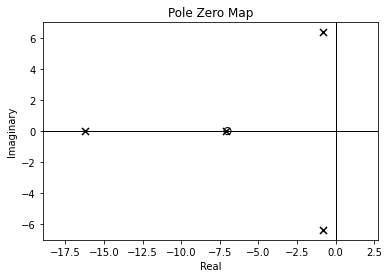

In [96]:
K = 685.71
closed_loop_system = feedback(sys*K)
print("The closed loop transfer function:", closed_loop_system)
pzmap(closed_loop_system)
plt.savefig('EXE_5_ITEM_4.eps',format='eps')

## Error for a parabola:

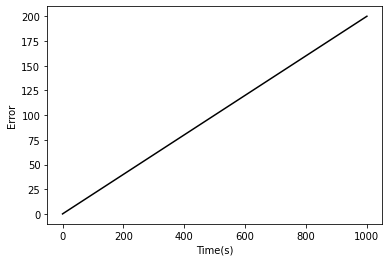

In [103]:
T = np.arange(0,1000,0.01)
y= lsim(closed_loop_system,T**2,T)
y_out = np.array(y[0])
plt.plot(T,T**2-y_out,'k')
plt.xlabel("Time(s)")
plt.ylabel("Error")
plt.savefig('EXE_5_parabola_error.eps',format='eps')
plt.show()

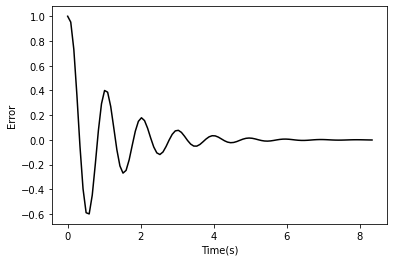

In [104]:
y_out,t_out = step(closed_loop_system)
plt.plot(t_out,np.ones_like(y_out)-y_out,'k')
plt.xlabel("Time(s)")
plt.ylabel("Error")
plt.savefig('EXE_5_step_error.eps',format='eps')
plt.show()

In [ ]:
T = np.arange(0,10,0.01)
y= lsim(closed_loop_system,0.1*T,T)
y_out = np.array(y[0])

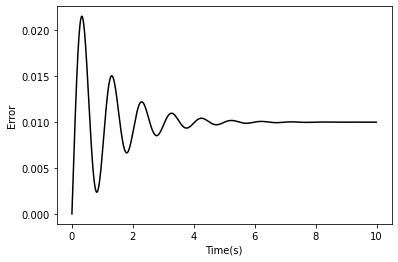

In [ ]:
plt.plot(T,0.1*T-y_out,'k')
plt.xlabel("Time(s)")
plt.ylabel("Error")
plt.savefig('EXE_5_ITEM_2.eps',format='eps')
plt.show()

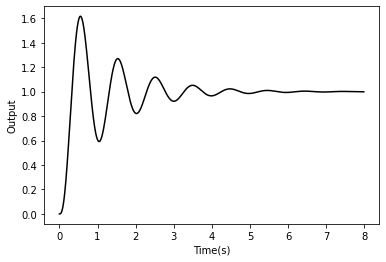

In [ ]:
T = np.arange(0,8,0.01)
y_step,T=step(closed_loop_system,T)
plt.plot(T,y_step,'k')
plt.xlabel("Time(s)")
plt.ylabel("Output")
plt.savefig('EXE_5_ITEM_3.eps',format='eps')
plt.show()

## 6)

Figure 2 represents a cascade control system of the temperature, $Y_1$ , in a small room which
is achieved by adjusting the hot/cold water flow, $Y_2$ , adjusted by an inner control loop (coloured in Figure 2). 

The relationship between the room temperature and the water low rate can be represented with the transfer function $G_{p1}$ , whereas $G_{p2}$ corresponds to the conditioning unit. $G_{c2}$ represents the water flow rate controller and $G_{c1}$ keeps the room temperature at the desired set-point by defining the needed water flow rate. $G_{m1}$ and $G_{m2}$ correspond to the temperature and flow rate measuring devices, respectively.

The disturbances can influence the system: $D_1$ represents unwanted changes in the water pressure inside the pipes and might affect $Y_2$ and $D_2$ represents possible variations in the external temperature and might affect $Y_1$.



In [60]:
s=tf('s')

In [63]:
K_c2 =1

In [70]:
G_p1=  0.1/(1000*(s**2)+70*s+1) 
G_p2= 1/(1+10*s) 
G_c1=100
G_c2= 1*(1+100*s)/s
G_m1=  1; 
G_m2=1/(1+s)
G_d1=  1; 
G_d2= 1

In [71]:
print(series(G_m2,G_c2,G_p2)+1)


10 s^3 + 11 s^2 + 101 s + 1
---------------------------
    10 s^3 + 11 s^2 + s



In [72]:
foward_path_2=series(G_p2,G_c2)
H_2 = feedback(foward_path_2,G_m2)
H_2


    100 s^2 + 101 s + 1
---------------------------
10 s^3 + 11 s^2 + 101 s + 1

In [73]:
foward_path_1= series(G_p1,G_c1)
foward_path_1= series(foward_path_1,H_2)
H_1 = feedback(foward_path_1,G_m1)
H_1


                      1000 s^2 + 1010 s + 10
-----------------------------------------------------------------
1e+04 s^5 + 1.17e+04 s^4 + 1.018e+05 s^3 + 9081 s^2 + 1181 s + 11

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


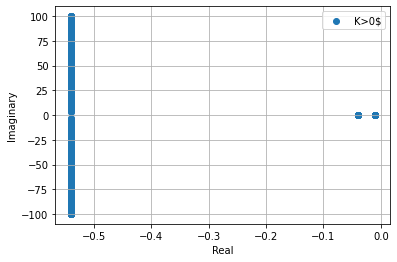

In [87]:
k_interval = np.arange(0,10**3,1)
G_m1=  1; 
G_m2=1/(1+s)
G_d1=  1; 
G_d2= 1
G_p1=  0.1/(1000*(s**2)+70*s+1) 
G_p2= 1/(1+10*s) 
G_c1=100
matrix = []
for k in k_interval:
    G_c2= k*(1+100*s)/s
    foward_path_2=series(G_p2,G_c2)
    H_2 = feedback(foward_path_2,G_m2)
    foward_path_1= series(G_p1,G_c1)
    foward_path_1= series(foward_path_1,H_2)
    H_1 = feedback(foward_path_1,G_m1)
    matrix.append(pole(H_1))
matrix=np.array(matrix)
x_negative = []
y_negative = []
x_positive = []
y_positive = []
for vector in matrix:
    for point in vector:
        if point.real<=0:
                x_negative.append(point.real)
                y_negative.append(point.imag)
        else:
                  
                x_positive.append(point.real)
                y_positive.append(point.imag)
plt.scatter(x_negative,y_negative,label='K>0$')
plt.scatter(x_positive,y_positive)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid('on')
plt.savefig('EXE_6_ITEM_2.eps',format='eps')

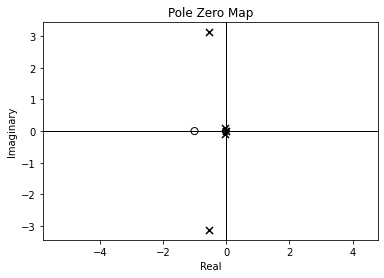

In [169]:
poles,zeros = pzmap(H_1)
plt.savefig('EX_6_pzmap_plt.eps',format='eps')

In [74]:
y,T=step(H_1,T=np.arange(0,180,0.01))

In [76]:
K =y[-1]*(0.0395**2+0.0968**2)

In [77]:
sys = K/((s+0.0395+0.0968j)*(s+0.0395-0.0968j))

/home/emmanuel/anaconda3/lib/python3.7/site-packages/control/xferfcn.py:935: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


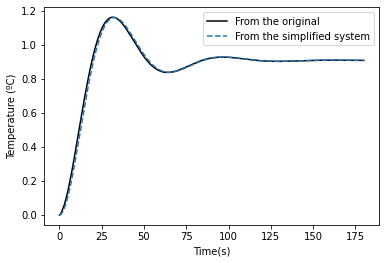

In [78]:
y,T=step(H_1,T=np.arange(0,180,0.01))
y_sim,T=step(sys,T=np.arange(0,180,0.01))
plt.plot(T,y,'k',label='From the original')
plt.plot(T,y_sim,'--',label='From the simplified system')
plt.xlabel('Time(s)')
plt.ylabel('Temperature (ºC)')
plt.legend()
plt.savefig('EXE_6_LAST_PRINT.eps',fomat='eps')
plt.show()

In [79]:
mse(y_sim,y)

0.000252528546421942

In [80]:
def second_order_info(y):
    final_value  = y[-1]
    max_value = max(y)
    peak_time = T[np.argmax(y)]
    OS = ((max_value-final_value)/final_value)*100


    aux = np.log(OS/100)
    damping_ratio = -aux/(np.pi**2+aux**2)**0.5

    omega_n = np.pi/(peak_time*(1-damping_ratio**2)**0.5)

    settling_time_b = 4/(damping_ratio*omega_n)


    K = final_value

    sys_tf = tf([K*omega_n**2],[1,2*omega_n*damping_ratio,omega_n**2])
    
    print("Settling time:",settling_time_b)
    print("Peak Time:",peak_time)
    print("The natural frequency: ",omega_n)
    print("The damping ratio:",damping_ratio)
    print("Overshoot",OS)
    print("The gain of the system: ",K)
    print(sys_tf)

In [84]:
print("For the original system:")
second_order_info(y)
second_order_info(y_sim)
print("For the simplified one:")

For the original system:
Settling time: 98.85555378922112
Peak Time: 31.52
The natural frequency:  0.10757013178822733
The damping ratio: 0.37615532761901993
Overshoot 27.93202729653574
The gain of the system:  0.9091545682955544

         0.01052
-------------------------
s^2 + 0.08093 s + 0.01157

Settling time: 101.17463342822805
Peak Time: 32.45
The natural frequency:  0.10457478294286249
The damping ratio: 0.3780605657969098
Overshoot 27.72237680094407
The gain of the system:  0.9093477765636265

        0.009945
-------------------------
s^2 + 0.07907 s + 0.01094

For the simplified one:


In [ ]:
y,T=step(sys_tf,T=np.arange(0,180,0.01))
y_sim,T=step(H_1,T=np.arange(0,180,0.01))
plt.plot(T,y,'k',label='From the original')
plt.plot(T,y_sim,'--',label='From the simplified system')
plt.xlabel('Time(s)')
plt.ylabel('Temperature (ºC)')
plt.legend()
plt.savefig('EXE_6_LAST_PRINT.eps',fomat='eps')
plt.show()